In [1]:
import pandas as pd
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
from scipy.signal import find_peaks # for detecting peaks


## Part 1 - Product Bigrams Trend Analysis

In [2]:
# Open file
df = pd.read_excel("data/bigrams_for_trend_analysis.xlsx")

# group data frame by month and bigrams
df_grouped = df.groupby(['month','bigram'])['bigram'].count().unstack()

# replace the null values with 0
df_grouped.replace(np.nan, '0',inplace=True)
df_grouped = df_grouped.astype(int)
df_grouped

bigram,air fryer,baking soda,boiling water,butcher block,carbon steel,cast iron,cheese grater,cinnamon toast,classic vintage,corner cabinet,...,rice dispenser,salt pepper,scrub daddy,spice cabinet,spice rack,stainless steel,toast crunch,useful tool,vacuum sealer,wood burning
month,,,,,,,,,,,,,,,,,,,,,
2020-06,2,0,0,0,0,0,0,0,0,0,...,0,2,0,1,7,5,0,0,0,0
2020-07,3,2,2,0,0,2,1,0,0,1,...,0,4,0,1,12,3,0,0,0,0
2020-08,2,1,0,0,0,0,0,0,0,1,...,0,5,0,0,1,1,0,0,0,0
2020-09,46,0,1,0,0,11,2,0,0,5,...,0,0,0,0,2,4,0,0,0,0
2020-10,3,4,4,1,0,26,0,0,0,2,...,0,4,0,0,4,3,0,0,0,0
2020-11,35,2,2,2,1,6,0,1,0,1,...,0,2,0,5,0,3,0,0,0,0
2020-12,7,6,1,17,25,22,1,0,0,0,...,1,5,0,0,5,7,0,0,0,0
2021-01,2,3,1,1,0,10,5,0,0,2,...,0,9,3,4,16,2,0,0,0,0
2021-02,5,0,2,7,5,28,3,0,0,6,...,1,1,0,3,13,37,0,0,0,1


In [3]:
# This gives you all the bigrams in the dataframe
# you can only keep the bigrams you are interested in and paste them into the list in next box 
df_grouped.columns

Index(['air fryer', 'baking soda', 'boiling water', 'butcher block',
       'carbon steel', 'cast iron', 'cheese grater', 'cinnamon toast',
       'classic vintage', 'corner cabinet', 'counter tops', 'crunch seasoning',
       'crunch spice', 'cumin powder', 'custom wood', 'cutting board',
       'dining room', 'drying rack', 'dutch oven', 'empty space',
       'expiration date', 'garlic powder', 'hot water', 'ice cream',
       'meal prep', 'non stick', 'olive oil', 'paper towel', 'pot filler',
       'potato salad', 'rice dispenser', 'salt pepper', 'scrub daddy',
       'spice cabinet', 'spice rack', 'stainless steel', 'toast crunch',
       'useful tool', 'vacuum sealer', 'wood burning'],
      dtype='object', name='bigram')

In [4]:
# This is an option to customize your own list of bigrams
df_grouped = df_grouped[['air fryer', 'butcher block','carbon steel', 'cast iron', 'cheese grater', 
                         'corner cabinet', 'counter tops', 'cutting board', 'drying rack', 'dutch oven', 
                         'non stick', 'pot filler', 'rice dispenser', 'spice cabinet', 'spice rack', 
                         'stainless steel', 'vacuum sealer'
                        ]]

### Trend Overview for all bigrams

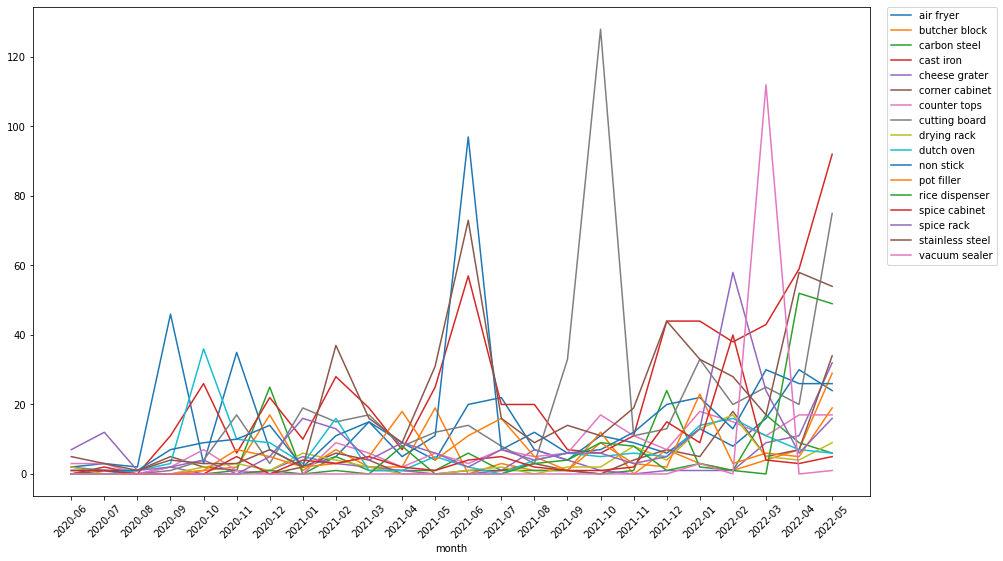

In [5]:
# an overview of the graph of all bigrams
# fig,ax = plt.subplots(figsize=(15,9))
df_grouped.plot(figsize=(15,9))
plt.xticks(np.arange(len(df_grouped.index)), df_grouped.index, rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


### Trend Detection

In [6]:
# This is the month priod of detecting trend
detect_month = 6

In [7]:
# define a method to get slopes of the line
def getSlope(list_of_index, array_of_data, order=1):
    result = np.polyfit(range(len(list_of_index)), array_of_data, order)
    slope = result[-2]
    return float(slope)

### Type 1: New Trend
#### Criteira: 
1. There are no data before 6 months (before 12/2021)
2. There are some data during the recent 6 months (after 12/2021)
3. The slope for 2-year data is upward

In [8]:
def newTrendDetector(df,detect_month,bigram_name):
    boo_list = []
    for value in df[bigram_name]:
        if value == 0:
            boo_list.append(0)
        else:
            boo_list.append(1)
    if sum(boo_list[:len(boo_list)-detect_month]) == 0 and sum(boo_list[-detect_month:]) != 0 and getSlope(df.index,df[bigram_name]) > 0:
        return True
    else:
        return False


### Type 2: Peaked Trend
#### Criteria:

There is a peak during the recent 6 months (after 12/2021)

In [10]:
def peakedTrendDetector(df,detect_month,bigram_name):
    
    # method to get the peak value
    # define the value of prominence: 50% percent of the max value in the recent 6 months, 
    prominence = df[bigram_name][-detect_month:].max()*0.5
    peaks, _ = find_peaks(df[bigram_name][-detect_month:], prominence=prominence)
    
    # if there is a peak, return a list of peaked months
    if peaks.size > 0:        
        peaks, _ = find_peaks(df[bigram_name], prominence=10)
        
        peaked_months_l = []
        for peak in peaks:
            peaked_month = df.index[peak]
            peaked_months_l.append(peaked_month)
        return peaked_months_l
    
    else:
        return False


### Type 3: Step Change
#### Criteria:
1. There is no peak during the recent 6 months (after 12/2021)
2. There is some data before 6 months (before 12/2021)
3. During the recent 6 months, there is at least one month whose 3-month standard deviation of moving average is greater than 2
4. The slope of the recent 6 months is positive

In [11]:
def stepChengeDetector(df,detect_month,bigram_name):
    move_avg_l = []
    std_l = []
    boo_list = []
    
    # calculate moving average in 3 months
    for i,value in enumerate(df[bigram_name]):
        if i <= 1:
            avg = stat.mean(df[bigram_name][0:i+1])
        else:
            avg = stat.mean(df[bigram_name][i-2:i+1])
        move_avg_l.append(avg)
    
    # calculate standard deviation for the moving average in 3 months
    for i,value in enumerate(move_avg_l):
        if i == 0:
            std = 0
        else:
            if i == 1:
                std = stat.stdev(move_avg_l[0:2])
            else:
                std = stat.stdev(move_avg_l[i-2:i+1])
        std_l.append(std)
    
    for x in std_l:
        if x > 2:
            boo_list.append(1)
        else:
            boo_list.append(0)
    
    # Make sure it is not a recent peaked trend
    if peakedTrendDetector(df,detect_month,bigram_name) == False:

        if sum(df[bigram_name][:len(boo_list)-detect_month]) != 0 and sum(boo_list[len(boo_list)-detect_month:]) != 0 and getSlope(df.index[-detect_month:],df[bigram_name][-detect_month:]) > 0:
            return True
                
        else:
            return False
    else: 
        return False

In [12]:
# create lists to save the bigrams of each type of trend
new_trend_l = []
peaked_trend_l = []
step_change_l = []

# create a dictionary to save the bigrams' peaked month
bigram_and_peaked_months = {}

for bigram_name in df_grouped.columns:
    
    if newTrendDetector(df_grouped,detect_month,bigram_name) != False:
        new_trend_bigram = bigram_name
        new_trend_l.append(new_trend_bigram)
        
    if peakedTrendDetector(df_grouped,detect_month,bigram_name) != False:
        peaked_bigram = bigram_name
        peaked_trend_l.append(peaked_bigram)
        bigram_and_peaked_months[bigram_name] = peakedTrendDetector(df_grouped,detect_month,bigram_name)
        
    if stepChengeDetector(df_grouped,detect_month,bigram_name) != False:
        step_change_bigram = bigram_name
        step_change_l.append(step_change_bigram)

In [13]:
new_trend_l

['vacuum sealer']

In [14]:
peaked_trend_l

['drying rack',
 'dutch oven',
 'pot filler',
 'spice cabinet',
 'spice rack',
 'vacuum sealer']

In [15]:
step_change_l

['air fryer',
 'butcher block',
 'cast iron',
 'cheese grater',
 'corner cabinet',
 'cutting board',
 'non stick',
 'rice dispenser',
 'stainless steel']

In [16]:
# Define a method to save bigrams trend graph to local folder
def saveTrendFig(df_grouped, trend_type, bigram_list):
    
    for bigram in bigram_list:
        df_single_bigram = df_grouped[[bigram]]
        
        df_single_bigram.plot(figsize=(15,9))
        plt.title(bigram,fontsize=20)
        plt.legend().set_visible(False)
        # plt.gcf().autofmt_xdate()
        plt.xticks(np.arange(len(df_grouped.index)), df_grouped.index, rotation=45)
        
        plt.savefig('data/graphs/bigrams/{} ({}).png'.format(trend_type,bigram), facecolor = 'white')
        plt.close()

In [17]:
# save graphs of new trend bigrams
saveTrendFig(df_grouped, 'new_trend', new_trend_l)

# save graphs of peaked trend bigrams
saveTrendFig(df_grouped, 'peaked_trend', peaked_trend_l)

# save graphs of new trend bigrams
saveTrendFig(df_grouped, 'step_change', step_change_l)

### Get video links of the peaked bigrams

In [18]:
# dictionary of peaked bigrams and their peaked months
bigram_and_peaked_months

{'drying rack': ['2022-02'],
 'dutch oven': ['2020-10', '2021-02', '2022-02'],
 'pot filler': ['2021-04', '2021-07', '2022-01'],
 'spice cabinet': ['2022-02'],
 'spice rack': ['2021-01', '2022-02'],
 'vacuum sealer': ['2022-03']}

In [19]:
# open the comments dataframe
comments_df = pd.read_excel('data/comments_all_clean.xlsx')
comments_df[:10]

,c_video_id,comment_id,comment_timestamp,comment_text,text_string,text_token,month
0,7082050405420551466,7082056310845539115,1648919735,i'm running in circles!!! where do i run to????,running run,"['running', 'run']",2022-04
1,7082050405420551466,7082081883085374214,1648925687,the fact that there was still some egg on the ...,fact egg plate,"['fact', 'egg', 'plate']",2022-04
2,7082050405420551466,7085158385347511083,1649641992,the caption 😭 sounds like a 1950s ad,caption,"['caption', 'ad']",2022-04
3,7082050405420551466,7082191775650399022,1648951276,"why didn’t you poured all the egg , it’s bothe...",egg,['egg'],2022-04
4,7082050405420551466,7090005163238900523,1650770475,every woman's dream? y'all ain't dreaming right!,woman,['woman'],2022-04
5,7082050405420551466,7089813843930022702,1650725931,you could’ve pour all of the egg in there…,pour egg,"['pour', 'egg']",2022-04
6,7082050405420551466,7088144220594668331,1650337187,i love everything except cooking 1 pancake at ...,except pancake,"['except', '1', 'pancake']",2022-04
7,7082050405420551466,7098311373763445510,1652704412,why didn’t you use all the egg mixture 😳,egg mixture,"['egg', 'mixture']",2022-05
8,7082050405420551466,7089438929711203118,1650638640,why is it every woman’s dream? my husband usua...,woman,['woman'],2022-04
9,7082050405420551466,7087345239284106030,1650151161,what do you mean by that. the caption,caption,['caption'],2022-04


In [32]:
# open the video dataframe to get the videos information
videos_df = pd.read_excel("data/videos_all_clean.xlsx")
videos_df.replace(np.nan, '',inplace=True)
videos_df

,video_id,video_timestamp,likes_count,comments_count,video_url,video_desc,video_transcript,text_string,month
0,6919824641510984965,1611147259,426900,2207,https://www.tiktok.com/@mamaandkidz/video/6919...,#mylife #mylifeas #minitoys #baking #bakingset...,,,2021-01
1,6891620407367994626,1604580417,7849,44,https://www.tiktok.com/@evichou17/video/689162...,Renyah dan wangi🤤#kekinian #viral #fyp #foryou...,begin you yapping couple muscle T-Mobile choco...,,2020-11
2,6889388819049647361,1604060835,6464,25,https://www.tiktok.com/@evichou17/video/688938...,Bolu kukus pop ice #bolukukus #popice #bolu #t...,Goosebumps eyes in Europe,pop ice,2020-10
3,6871212488822656257,1599828829,5465,34,https://www.tiktok.com/@evichou17/video/687121...,Asik nih buat yg suka ngemil #bakingset@steinc...,,,2020-09
4,6901266520828120321,1606826328,5134,16,https://www.tiktok.com/@evichou17/video/690126...,"Tanpa SP, ekonomis dan praktis #icecream #@cho...",,,2020-12
...,...,...,...,...,...,...,...,...,...
10206,6962739399196937478,1621139102,59,1,https://www.tiktok.com/@darknsexydragonlady/vi...,#duet with @foodies #beautiful🐢 #ocd #utensils...,,,2021-05
10207,6841040327818759430,1592803829,52,17,https://www.tiktok.com/@bestamazonprimecodes/v...,Price drop no code needed #amazon #amazoncodes...,,drop,2020-06
10208,7001319000948903173,1630121611,51,3,https://www.tiktok.com/@rcstiktoktv/video/7001...,What is this? #fypシ #wierd #utensils #kitchen ...,kitchen utensil is this,utensil,2021-08
10209,6950489866169748742,1618287037,97,15,https://www.tiktok.com/@carolineschulze5/video...,i support radical utensils #college#fyp #stitc...,nobody literally like this is going to change ...,support radical nobody change,2021-04


In [21]:
def getVideoRefDF(videos_df, comments_df, bigram_months_dic):
    

    bigram_l = []
    month_l = []
    video_id_l = []
    
    # Step 1
    # check each comment, see if it contains the biagram
    # save the bigram name, month, and video id
    
    for i,comment_text in enumerate(comments_df['comment_text']):
        
        for bigram in bigram_months_dic:
            
            for month in bigram_months_dic[bigram]:
                
                if comments_df['month'][i] == month and bigram in comment_text:
                    bigram_l.append(bigram)
                    month_l.append(month)
                    video_id_l.append(comments_df['c_video_id'][i])
                    
    # Step 2
    # check the video text for each video, see if it contains the bigram
    # save the bigram name, month, and video id
                    
    for i,video_text in enumerate(videos_df['text_string']):
        
        for bigram in bigram_months_dic:
            
            for month in bigram_months_dic[bigram]:
                
                if videos_df['month'][i] == month and bigram in video_text:
                    bigram_l.append(bigram)
                    month_l.append(month)
                    video_id_l.append(videos_df['video_id'][i])
                
    # Step 3
    # create a dataframe and save the above information
    ref_videos_dic = {'bigram': bigram_l,
                      'month': month_l,
                      'video_id': video_id_l,
                      }
    ref_videos_df = pd.DataFrame(ref_videos_dic)
    
    # add a column shows how many times the bigram is mentioned in the comments for each video
    ref_videos_df = ref_videos_df.value_counts().reset_index(name='bigram_mentioned_times')
    ref_videos_df
    
    
    # Step 4
    # join the previous generated dataframe with some column in the video dataframe by video id
    ref_videos_df = pd.merge(ref_videos_df, videos_df[['video_id','likes_count','comments_count','video_url','video_desc','video_transcript']], on="video_id")
    
    # drop the video id column (not useful)
    ref_videos_df = ref_videos_df.drop(columns=['video_id'])
    
    # sort by bigram name, month, and the times that bigram is mentioned in the comments
    ref_videos_df = ref_videos_df.sort_values(by=['bigram', 'month','bigram_mentioned_times'], ascending = [True, True, False], ignore_index=True)
    
    return ref_videos_df

                     

In [33]:
# get the videos reference data frame for the peaked bigrams
peaked_videos_df = getVideoRefDF(videos_df, comments_df, bigram_and_peaked_months)
peaked_videos_df

,bigram,month,bigram_mentioned_times,likes_count,comments_count,video_url,video_desc,video_transcript
0,drying rack,2022-02,3,4743,139,https://www.tiktok.com/@yourlifeiswhatyoumakei...,Reply to @jendelaisla #amazon #amazonfinds #si...,here is the video of the scene that we got it ...
1,drying rack,2022-02,2,2424,15,https://www.tiktok.com/@byjamiemichelle/video/...,Obsessed! Linked ‘em for ya! #kitchenhacks #ki...,we have been loving and our first home this dr...
2,drying rack,2022-02,1,8823,508,https://www.tiktok.com/@yourlifeiswhatyoumakei...,DIY kitchen makeover #diy #diyer #diykitchen #...,wait wait wait
3,drying rack,2022-02,1,234300,1400,https://www.tiktok.com/@haleypasz/video/706284...,im a landlords worst nightmare #apartmentdecor...,
4,drying rack,2022-02,1,56,0,https://www.tiktok.com/@idyllickitchen/video/7...,Kitchen with Ease. ❤️ Store Link in Bio. 😊 or ...,this will change your life this mean I slept o...
...,...,...,...,...,...,...,...,...
75,spice rack,2022-02,1,209,3,https://www.tiktok.com/@thejennataylor/video/7...,Kitchen essentials 🤍 #kitchenware #kitchenesse...,that make me happy these last months something...
76,spice rack,2022-02,1,17100,195,https://www.tiktok.com/@yazidrizkiramadhan/vid...,refill time ✨ So excited because I have a new ...,
77,spice rack,2022-02,1,196800,1106,https://www.tiktok.com/@thewoodworks/video/702...,"One of our new favourites, what do you like ab...",I love you
78,spice rack,2022-02,1,14900,49,https://www.tiktok.com/@everythingenvy/video/7...,Like & follow for all the best organizing tips...,if you are not very for the day it cannot alwa...


In [34]:
# save to local folder
peaked_videos_df.to_excel('data/peaked_bigrams_video_reference.xlsx', index=False)

## Part 2 - Color Bigrams Trend Analysis

In [35]:
# Open color bigram file
df_color = pd.read_excel('data/color_bigrams_for_trend_analysis.xlsx')

# group data frame by month and bigrams
df_color_grouped = df_color.groupby(['month','bigram'])['bigram'].count().unstack()

# replace the null values with 0
df_color_grouped.replace(np.nan, '0',inplace=True)
df_color_grouped = df_color_grouped.astype(int)
df_color_grouped

bigram,black glass,black set,blue plate,blue steel,brown granite,gold flatware,gold handle,gold set,green pan,pewter green,pink pan,pink set,purple utensil,red chopper,yellow bowl
month,,,,,,,,,,,,,,,
2020-07,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0
2020-08,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2020-09,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-10,0,0,0,0,0,0,3,1,0,0,5,0,0,0,0
2020-11,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0
2020-12,0,0,0,1,0,0,0,0,1,0,0,2,0,0,0
2021-01,0,1,1,0,0,0,0,0,0,0,0,2,0,0,0
2021-02,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
2021-03,0,1,0,0,0,0,0,1,4,0,1,0,0,0,0


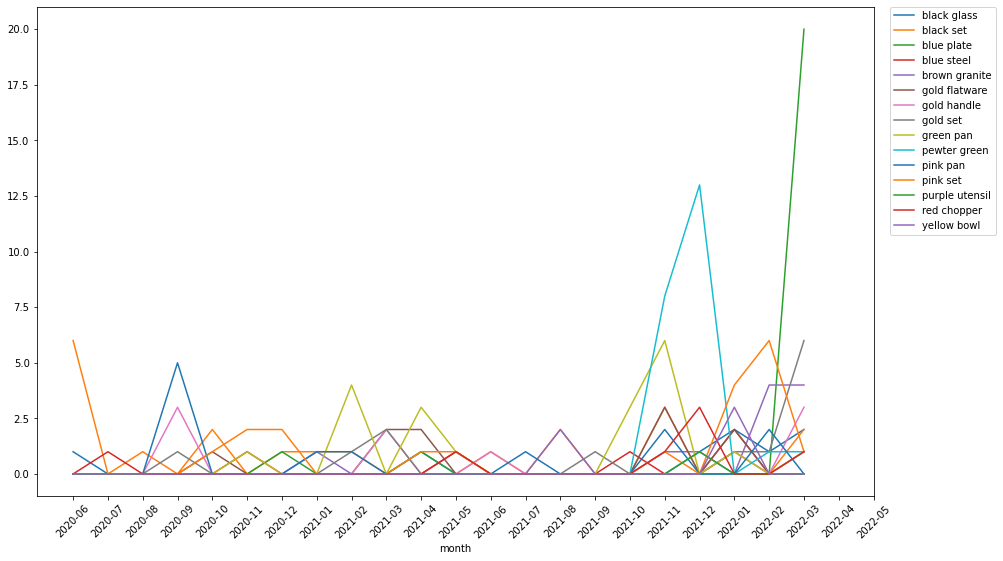

In [25]:
# an overview of the graph of all color bigrams
# fig,ax = plt.subplots(figsize=(15,9))
df_color_grouped.plot(figsize=(15,9))
plt.xticks(np.arange(len(df_grouped.index)), df_grouped.index, rotation=45)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


## Get video links of color bigrams
As shown in the above chart, the color bigrams are not mentioned as many times as the product bigrams. Therefore, we decided no to use the trend analysis.

Instead, we set a threshold value if a bigram is mentioned more than the threshold value in a month, we provide the video links of the videos in that month.

In [36]:
# you can change the threshold
threshold = 10

In [37]:
# get the color bigrams mentioned more than the threshold and the months

color_bigram_and_months = {}

for color_bigram in df_color_grouped.columns:
    
    months = []
    for i, mentioned_times in enumerate(df_color_grouped[color_bigram]):
        if mentioned_times > threshold:
            months.append(df_color_grouped.index[i])
    
    if months: # if the list is not null
        color_bigram_and_months[color_bigram] = months

color_bigram_and_months

{'blue plate': ['2022-05'], 'pewter green': ['2022-02']}

In [38]:
# get the video reference data frame of color bigrams
color_videos_df = getVideoRefDF(videos_df, comments_df, color_bigram_and_months)
color_videos_df

,bigram,month,bigram_mentioned_times,likes_count,comments_count,video_url,video_desc,video_transcript
0,blue plate,2022-05,20,8208,168,https://www.tiktok.com/@mississippi_kween/vide...,#tartarsauce #tartar #sauce #homemade #cooktok...,
1,pewter green,2022-02,9,35700,559,https://www.tiktok.com/@yourlifeiswhatyoumakei...,I dub this the #paintstickchallenge #paintsti...,
2,pewter green,2022-02,4,8823,508,https://www.tiktok.com/@yourlifeiswhatyoumakei...,DIY kitchen makeover #diy #diyer #diykitchen #...,wait wait wait


In [39]:
# save to local folder
color_videos_df.to_excel('data/color_bigrams_video_reference.xlsx', index=False)